In [1]:
from itertools import product
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import numpy as np
import xarray as xr
import scipy 
import lightningutil

In [2]:
"""
/aosc/eos20/djallen/lightning/geos/twod/201907            cmap

GEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N.nc       *    YlOrRd
GEOS_cldht_hrly.UT.t201907.r180W-30W_50S-50N.nc      *    copper  
GEOS_l_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    
GEOS_mf_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc   *    ocean_r
GEOS_pblh_hrly.UT.t201907.r180W-30W_50S-50N.nc       *    tab20b , BuPu
GEOS_p_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    PuRd_r
GEOS_p_ctop_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    binary , plasma_r *cant have white
GEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    cool
GEOS_pretot_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    summer
GEOS_t_sfc_hrly.UT.t201907.r180W-30W_50S-50N.nc      *    turbo
GEOS_z_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    pink

/aosc/eos20/djallen/lightning/geos/twod_440/201907

GEOS_cldfrac_conv_440_hrly.UT.t201907.r180W-30W_50S-50N.nc   *
GEOS_cldfrac_ls_440_hrly.UT.t201907.r180W-30W_50S-50N.nc     *
GEOS_cnv_mfc_440_hrly.UT.t201907.r180W-30W_50S-50N.nc        *   ocean_r
GEOS_iwc_440_hrly.UT.t201907.r180W-30W_50S-50N.nc            *   winter

lightning

/aosc/eos20/djallen/data/lightning/glm/2019

GLMmax_hrly_count_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc    *
GLMmax_hrly_count_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc    *
GLMmax_hrly_energy_f.nominalq.UT.t201907.r180W-30W_50S-50N.nc   *
GLMmax_hrly_energy_g.nominalq.UT.t201907.r180W-30W_50S-50N.nc   *
"""

'\n/aosc/eos20/djallen/lightning/geos/twod/201907            cmap\n\nGEOS_cape_hrly.UT.t201907.r180W-30W_50S-50N.nc       *    YlOrRd\nGEOS_cldht_hrly.UT.t201907.r180W-30W_50S-50N.nc      *    copper  \nGEOS_l_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    \nGEOS_mf_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc   *    ocean_r\nGEOS_pblh_hrly.UT.t201907.r180W-30W_50S-50N.nc       *    tab20b , BuPu\nGEOS_p_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    PuRd_r\nGEOS_p_ctop_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    binary , plasma_r *cant have white\nGEOS_precon_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    cool\nGEOS_pretot_hrly.UT.t201907.r180W-30W_50S-50N.nc     *    summer\nGEOS_t_sfc_hrly.UT.t201907.r180W-30W_50S-50N.nc      *    turbo\nGEOS_z_cbase_hrly.UT.t201907.r180W-30W_50S-50N.nc    *    pink\n\n/aosc/eos20/djallen/lightning/geos/twod_440/201907\n\nGEOS_cldfrac_conv_440_hrly.UT.t201907.r180W-30W_50S-50N.nc   *\nGEOS_cldfrac_ls_440_hrly.UT.t201907.r180W-30W_50S-50N.nc  

In [2]:
mo_str='07'
yr_str='2019'

list_of_files=[
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_cape_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_cldht_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_l_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_mf_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_pblh_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_p_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_p_ctop_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_precon_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_pretot_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_t_sfc_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_z_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_cldfrac_conv_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_cldfrac_ls_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_cnv_mfc_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_iwc_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_count_f.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_count_g.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_energy_f.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_energy_g.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
]

In [3]:
mo_str='08'
yr_str='2019'

list_of_files_02=[
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_cape_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_cldht_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_l_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_mf_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_pblh_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_p_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_p_ctop_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_precon_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_pretot_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_t_sfc_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_z_cbase_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_cldfrac_conv_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_cldfrac_ls_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_cnv_mfc_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/lightning/geos/twod_440/{yr_str}{mo_str}/GEOS_iwc_440_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_count_f.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_count_g.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_energy_f.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
    f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_energy_g.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc",
]

In [15]:
matrix_corr = np.zeros((19,19))

for (f1, f2), (n1, n2) in zip(product(list_of_files, list_of_files),product(range(0,19),range(0,19))):

    print(n1, n2)
    
    # open and preprocess coordinates
    ds_var1 = lightningutil.open_and_preprocess(f1, lightningutil.variables)
    ds_var2 = lightningutil.open_and_preprocess(f2, lightningutil.variables)
    
    # reshape into 2D array
    ds_var1_v2 = ds_var1.stack(point=("Longitudes","Latitudes"))
    ds_var2_v2 = ds_var2.stack(point=("Longitudes","Latitudes"))
    
    # mask nans out
    ds_var1_v2 = ds_var1_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_var2_v2 = ds_var2_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    
    ds_var2_v2 = ds_var2_v2[~np.isnan(ds_var1_v2)]
    ds_var1_v2 = ds_var1_v2[~np.isnan(ds_var1_v2)]
    
    matrix_corr[n1,n2] = scipy.stats.pearsonr(
        ds_var1_v2,
        ds_var2_v2
    )[0]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
1

In [16]:
matrix_corr

array([[ 1.00000000e+00,  7.52234937e-01,  1.93199223e-01,
         8.91241775e-02, -1.77527188e-01,  1.33139013e-01,
        -6.57484519e-01,  2.08237873e-01,  1.03782272e-01,
         4.42594718e-01, -1.58414112e-01, -1.09186298e-02,
        -9.56092024e-03,  2.06187345e-01, -2.41936124e-02,
         8.20352390e-02,  6.60139408e-02,  8.82227958e-02,
         1.37982515e-02],
       [ 7.52234937e-01,  1.00000000e+00,  2.08576269e-01,
         2.54195307e-01, -2.14197310e-01, -1.00212628e-02,
        -9.56312324e-01,  3.97868058e-01,  2.22552488e-01,
         4.20281436e-01, -1.65824418e-01,  2.82167102e-02,
         6.88081254e-02,  4.08966023e-01,  2.82309692e-02,
         7.42473333e-02,  6.05369259e-02,  7.62893229e-02,
         1.17229392e-02],
       [ 1.93199223e-01,  2.08576269e-01,  1.00000000e+00,
         1.02422798e-02, -9.70101852e-01,  2.23195567e-01,
        -1.44532205e-01,  5.49205092e-02,  1.91099635e-02,
        -1.70910997e-01, -9.86395100e-01, -3.23396330e-02,
    

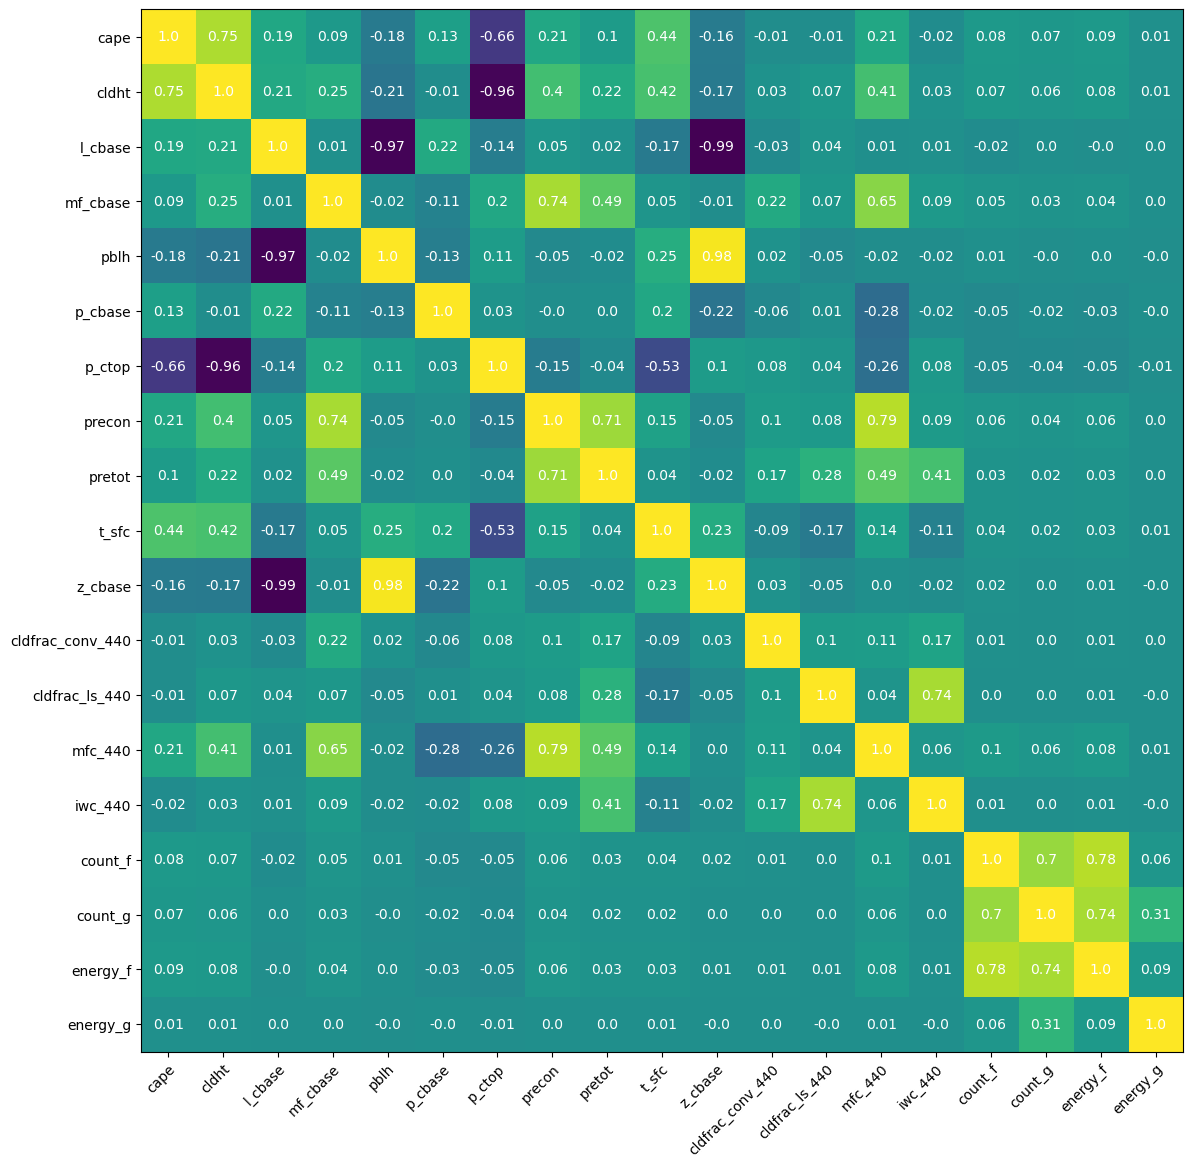

In [23]:
variables = [
    "cape",
    "cldht",
    "l_cbase",
    "mf_cbase",
    "pblh",
    "p_cbase",
    "p_ctop",
    "precon",
    "pretot",
    "t_sfc",
    "z_cbase",
    
    "cldfrac_conv_440",
    "cldfrac_ls_440",
    "mfc_440",
    "iwc_440",

    "count_f",
    "count_g",
    "energy_f",
    "energy_g",
]

matrix_corr_v2 = np.around(matrix_corr,2)

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(matrix_corr, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(variables)), labels=variables)
ax.set_yticks(np.arange(len(variables)), labels=variables)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right",
    rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, matrix_corr_v2[i, j], ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

### masking by lightning being non-zero

In [31]:
ds_lightning = f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_count_g.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc"
ds_precon = f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_precon_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc"

In [11]:
matrix_corr = np.zeros((19,19))

for (f1, f2), (n1, n2) in zip(product(list_of_files, list_of_files),product(range(0,19),range(0,19))):

    print(n1, n2)
    
    # open and preprocess coordinates
    ds_var1 = lightningutil.open_and_preprocess(f1, lightningutil.variables)
    ds_var2 = lightningutil.open_and_preprocess(f2, lightningutil.variables)
    ds_varl = lightningutil.open_and_preprocess(ds_lightning, lightningutil.variables)
    
    # reshape into 2D array
    ds_var1_v2 = ds_var1.stack(point=("Longitudes","Latitudes"))
    ds_var2_v2 = ds_var2.stack(point=("Longitudes","Latitudes"))
    ds_varl_v2 = ds_varl.stack(point=("Longitudes","Latitudes"))
    
    # mask nans out
    ds_var1_v2 = ds_var1_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varl_v2 = ds_varl_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_var2_v2 = ds_var2_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    
    ds_var2_v2 = ds_var2_v2[~np.isnan(ds_var1_v2)]
    ds_varl_v2 = ds_varl_v2[~np.isnan(ds_var1_v2)]
    ds_var1_v2 = ds_var1_v2[~np.isnan(ds_var1_v2)]
    
    ds_var2_v2 = ds_var2_v2[ds_varl_v2>0.]
    ds_var1_v2 = ds_var1_v2[ds_varl_v2>0.]
    ds_varl_v2 = ds_varl_v2[ds_varl_v2>0.]
    
    matrix_corr[n1,n2] = scipy.stats.pearsonr(
        ds_var1_v2,
        ds_var2_v2
    )[0]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
1

In [13]:
ds_var2_v2.shape

(863434,)

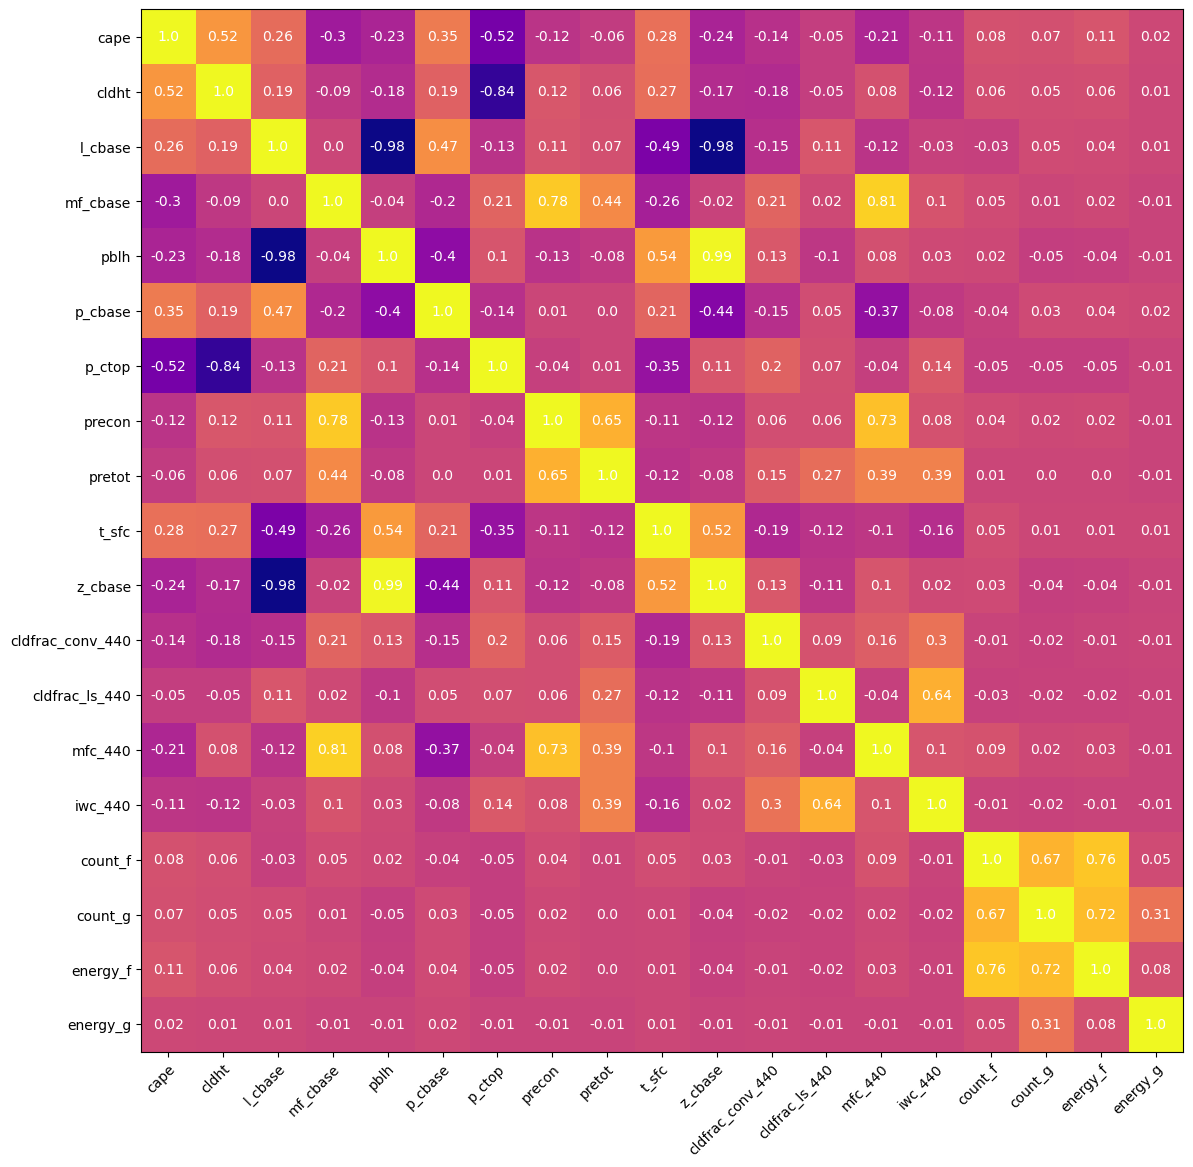

In [12]:
variables = [
    "cape",
    "cldht",
    "l_cbase",
    "mf_cbase",
    "pblh",
    "p_cbase",
    "p_ctop",
    "precon",
    "pretot",
    "t_sfc",
    "z_cbase",
    
    "cldfrac_conv_440",
    "cldfrac_ls_440",
    "mfc_440",
    "iwc_440",

    "count_f",
    "count_g",
    "energy_f",
    "energy_g",
]

matrix_corr_v2 = np.around(matrix_corr,2)

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(matrix_corr, cmap='plasma')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(variables)), labels=variables)
ax.set_yticks(np.arange(len(variables)), labels=variables)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right",
    rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, matrix_corr_v2[i, j], ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

(44640000,)

In [24]:
matrix_corr = np.zeros((19,19))

for (f1, f2), (n1, n2) in zip(product(list_of_files, list_of_files),product(range(0,19),range(0,19))):

    print(n1, n2)
    
    # open and preprocess coordinates
    ds_var1 = lightningutil.open_and_preprocess(f1, lightningutil.variables)
    ds_var2 = lightningutil.open_and_preprocess(f2, lightningutil.variables)
    ds_varl = lightningutil.open_and_preprocess(ds_lightning, lightningutil.variables)
    ds_varp = lightningutil.open_and_preprocess(ds_precon, lightningutil.variables)
    
    # reshape into 2D array
    ds_var1_v2 = ds_var1.stack(point=("Longitudes","Latitudes"))
    ds_var2_v2 = ds_var2.stack(point=("Longitudes","Latitudes"))
    ds_varl_v2 = ds_varl.stack(point=("Longitudes","Latitudes"))
    ds_varp_v2 = ds_varp.stack(point=("Longitudes","Latitudes"))
    
    # mask nans out
    ds_var1_v2 = ds_var1_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varl_v2 = ds_varl_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varp_v2 = ds_varp_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_var2_v2 = ds_var2_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    
    print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    ds_var2_v2 = ds_var2_v2[~np.isnan(ds_var1_v2)]
    ds_varl_v2 = ds_varl_v2[~np.isnan(ds_var1_v2)]
    ds_varp_v2 = ds_varp_v2[~np.isnan(ds_var1_v2)]
    ds_var1_v2 = ds_var1_v2[~np.isnan(ds_var1_v2)]
    
    print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    # where both lightning and convective precip are greater than zero
    mask = (ds_varl_v2 > 0.) & (ds_varp_v2 > 0.)  # OR is |    # AND is &
    
    ds_var1_v2 = ds_var1_v2[mask]
    ds_var2_v2 = ds_var2_v2[mask]
    
    print(ds_var1_v2.shape, ds_var2_v2.shape)
    
    matrix_corr[n1,n2] = scipy.stats.pearsonr(
        ds_var1_v2,
        ds_var2_v2
    )[0]

0 0
(39245677,) (39245677,) (39245677,) (39245677,)
(39245677,) (39245677,) (39245677,) (39245677,)
(752992,) (752992,)
0 1
(27100243,) (27100243,) (27100243,) (27100243,)
(26887896,) (26887896,) (26887896,) (26887896,)
(752992,) (752992,)
0 2
(44640000,) (44640000,) (44640000,) (44640000,)
(39245677,) (39245677,) (39245677,) (39245677,)
(752992,) (752992,)
0 3
(44640000,) (44640000,) (44640000,) (44640000,)
(39245677,) (39245677,) (39245677,) (39245677,)
(752992,) (752992,)
0 4
(44640000,) (44640000,) (44640000,) (44640000,)
(39245677,) (39245677,) (39245677,) (39245677,)
(752992,) (752992,)
0 5
(12270557,) (12270557,) (12270557,) (12270557,)
(12081733,) (12081733,) (12081733,) (12081733,)
(752992,) (752992,)
0 6
(12270557,) (12270557,) (12270557,) (12270557,)
(12081733,) (12081733,) (12081733,) (12081733,)
(752992,) (752992,)
0 7
(44640000,) (44640000,) (44640000,) (44640000,)
(39245677,) (39245677,) (39245677,) (39245677,)
(752992,) (752992,)
0 8
(44640000,) (44640000,) (44640000,) 

KeyboardInterrupt: 

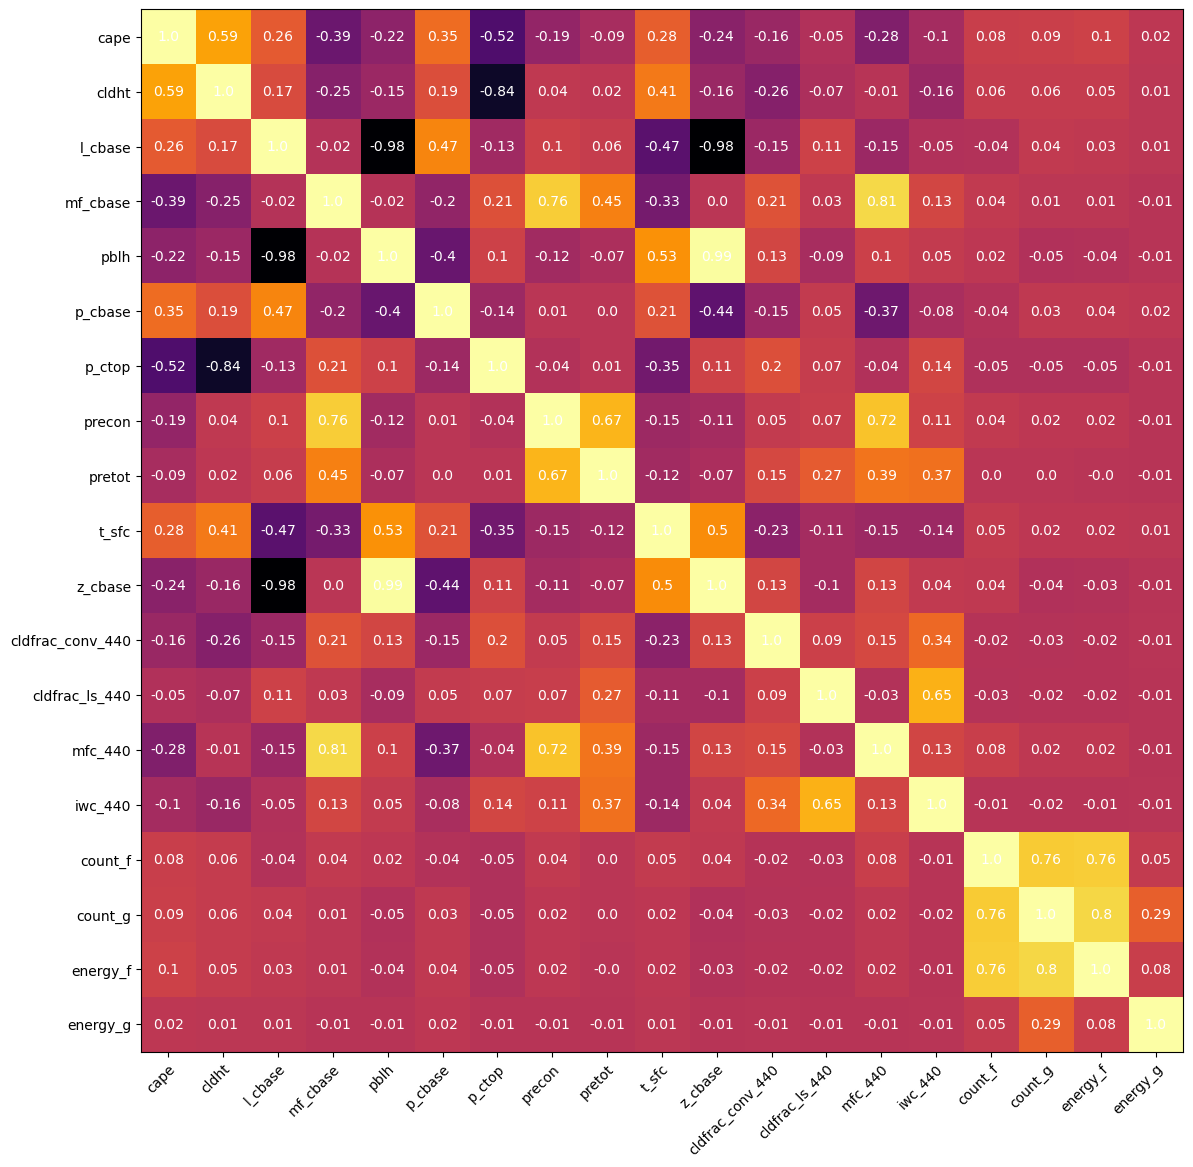

In [15]:
variables = [
    "cape",
    "cldht",
    "l_cbase",
    "mf_cbase",
    "pblh",
    "p_cbase",
    "p_ctop",
    "precon",
    "pretot",
    "t_sfc",
    "z_cbase",
    
    "cldfrac_conv_440",
    "cldfrac_ls_440",
    "mfc_440",
    "iwc_440",

    "count_f",
    "count_g",
    "energy_f",
    "energy_g",
]

matrix_corr_v2 = np.around(matrix_corr,2)

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(matrix_corr, cmap='inferno')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(variables)), labels=variables)
ax.set_yticks(np.arange(len(variables)), labels=variables)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right",
    rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, matrix_corr_v2[i, j], ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

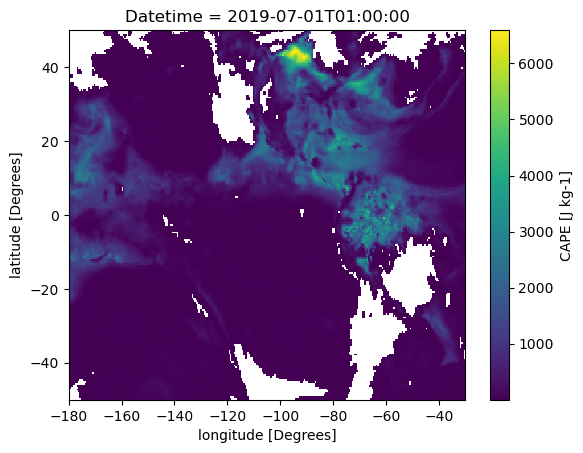

In [68]:
ds_var1.isel(Datetime=0).plot()

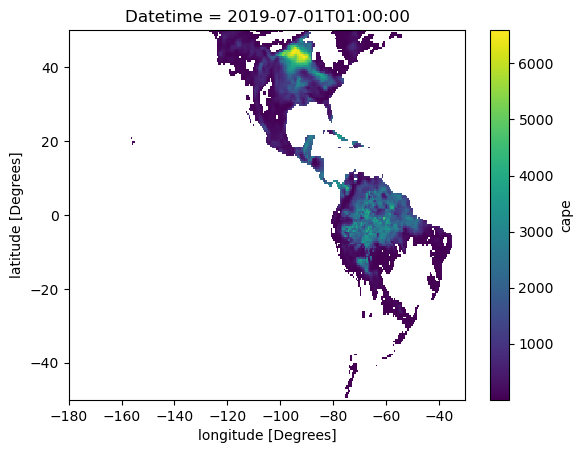

In [63]:
xr.where(ls_mask==1, ds_var1, np.nan)

In [45]:
ds_var1

<xarray.DataArray 'cape' (Latitudes: 200, Longitudes: 300, Datetime: 744)>
array([[[           nan,            nan,            nan, ...,
         1.47812757e+01, 9.72660160e+00, 8.23849106e+00],
        [           nan,            nan,            nan, ...,
         1.13164320e+01, 7.01371145e+00, 9.06661606e+00],
        [           nan,            nan,            nan, ...,
         9.44143200e+00, 6.19144583e+00, 8.70333481e+00],
        ...,
        [7.01816416e+00, 8.71103287e+00, 8.30086422e+00, ...,
         6.85373023e-02, 1.08773537e-01, 2.72915363e-01],
        [6.70566416e+00, 9.01572037e+00, 8.53523922e+00, ...,
         2.01593153e-02, 4.01700214e-02, 5.14370441e-01],
        [7.28574228e+00, 9.45322037e+00, 9.61727047e+00, ...,
         1.43914921e-02, 2.47659028e-01, 2.84878254e-01]],

       [[           nan,            nan,            nan, ...,
         9.39455700e+00, 7.47269583e+00, 8.64864731e+00],
        [           nan,            nan,            nan, ...,
         8.11721325e+00, 8.17582035e+00, 9.30489731e+00],
        [           nan,            nan,            nan, ...,
         1.28125257e+01, 1.02031641e+01, 8.91036606e+00],
...
        [           nan,            nan,            nan, ...,
         1.97500248e+01, 2.16953526e+01, 1.80548973e+01],
        [           nan,            nan,            nan, ...,
         1.40976820e+01, 2.04609776e+01, 2.12658348e+01],
        [           nan,            nan,            nan, ...,
         6.74416590e+00, 1.68203526e+01, 2.26955223e+01]],

       [[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
         5.37893152e+00, 1.12383204e+01, 1.45900536e+01],
        [           nan,            nan,            nan, ...,
         3.69338465e+00, 7.22855520e+00, 1.44923973e+01],
        [           nan,            nan,            nan, ...,
         3.29397058e+00, 6.33793020e+00, 1.36603661e+01]]], dtype=float32)
Coordinates:
  * Longitudes  (Longitudes) float32 -179.8 -179.2 -178.8 ... -30.75 -30.25
  * Latitudes   (Latitudes) float32 -49.75 -49.25 -48.75 ... 48.75 49.25 49.75
  * Datetime    (Datetime) datetime64[ns] 2019-07-01T01:00:00 ... 2019-08-01
Attributes:
    long_name:      CAPE
    units:          J kg-1
    var_desc:       cape_for_surface_parcel 
    missing_value:  nan

In [18]:
ds_lightning = f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_count_g.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc"
ds_precon = f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_precon_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc"

In [19]:
matrix_corr = np.zeros((19,19))
counter = 0

for (f1, f2), (n1, n2) in zip(product(list_of_files, list_of_files),product(range(0,19),range(0,19))):

    print(n1, n2)
    
    # open and preprocess coordinates
    ds_var1 = lightningutil.open_and_preprocess(f1, lightningutil.variables)
    ds_var2 = lightningutil.open_and_preprocess(f2, lightningutil.variables)
    ds_varl = lightningutil.open_and_preprocess(ds_lightning, lightningutil.variables)
    ds_varp = lightningutil.open_and_preprocess(ds_precon, lightningutil.variables)
    
    if counter==0:
        
        ls_mask = xr.open_dataset(
            "/aosc/eos20/djallen/lightning/geos/twod/201907/lightning_1.ltx_inst_1hr_g720x360_x1.20190714_0100z.nc4"
        )['FRLAND'].isel(time=0)
        
        ls_mask = ls_mask.where(ls_mask<0.5,1.0)
        
        ls_mask = ls_mask.sel(
            lat=slice(ds_var1['Latitudes'][0],ds_var1['Latitudes'][-1]), 
            lon=slice(ds_var1['Longitudes'][0],ds_var1['Longitudes'][-1])
        )
        
        ls_mask = ls_mask.expand_dims(
            dim={"Datetime": 1}).transpose('lat','lon','Datetime').values
        
        counter =+ 1
    
    # remove ocean points (make nan)
    ds_var1 = xr.where(ls_mask==1, ds_var1, np.nan)
    ds_var2 = xr.where(ls_mask==1, ds_var2, np.nan)
    ds_varl = xr.where(ls_mask==1, ds_varl, np.nan)
    ds_varp = xr.where(ls_mask==1, ds_varp, np.nan)
    
    # reshape into 2D array
    ds_var1_v2 = ds_var1.stack(point=("Longitudes","Latitudes"))
    ds_var2_v2 = ds_var2.stack(point=("Longitudes","Latitudes"))
    ds_varl_v2 = ds_varl.stack(point=("Longitudes","Latitudes"))
    ds_varp_v2 = ds_varp.stack(point=("Longitudes","Latitudes"))
    
    # mask nans out
    ds_var1_v2 = ds_var1_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varl_v2 = ds_varl_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varp_v2 = ds_varp_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_var2_v2 = ds_var2_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    ds_var2_v2 = ds_var2_v2[~np.isnan(ds_var1_v2)]
    ds_varl_v2 = ds_varl_v2[~np.isnan(ds_var1_v2)]
    ds_varp_v2 = ds_varp_v2[~np.isnan(ds_var1_v2)]
    ds_var1_v2 = ds_var1_v2[~np.isnan(ds_var1_v2)]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    # where both lightning and convective precip are greater than zero
    mask = (ds_varl_v2 > 0.) & (ds_varp_v2 > 0.)  # OR is |    # AND is &
    
    ds_var1_v2 = ds_var1_v2[mask]
    ds_var2_v2 = ds_var2_v2[mask]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape)
    
    matrix_corr[n1,n2] = scipy.stats.spearmanr(
        ds_var1_v2,
        ds_var2_v2
    )[0]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
1

(array([459.,  88.,  53.,  44.,  24.,  29.,  17.,  26.,  12.,   9.,  11.,
          9.,   8.,   2.,  10.,   9.,   6.,   4.,   2.,   5.,   4.,   3.,
          2.,   2.,   4.,   4.,   1.,   2.,   1.,   2.,   2.,   2.,   0.,
          0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.,   3.,   1.,
          2.,   3.,   1.,   3.,   0.,   0.,   0.,   0.,   2.,   2.,   1.,
          1.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.54328340e-01, 5.08578186e+02, 1.01690204e+03, 1.52522595e+03,
        2.03354980e+03, 2.54187354e+03, 3.05019751e+03, 3.55852148e+03,
        4.06684521e+03, 4.57516895e+03, 5.08349316e+03, 5.59181689e+03,
        6.10014062e+03, 6.60846436e+03, 7.11678857e+03, 7.62511230e+03,
        8.13343604e+03, 8.6417

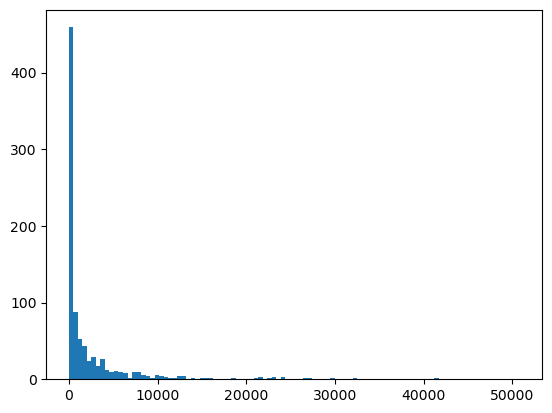

In [26]:
plt.hist(ds_var1.where(ds_var1>0,np.nan).isel(Datetime=0).stack(new=["Latitudes","Longitudes"]),bins=100)

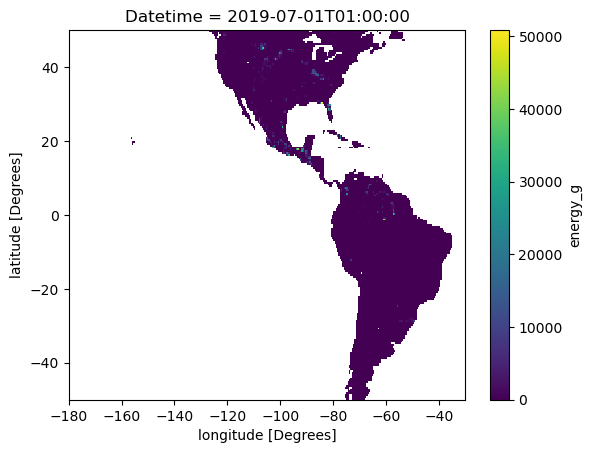

In [12]:
ds_var2.isel(Datetime=0).plot()

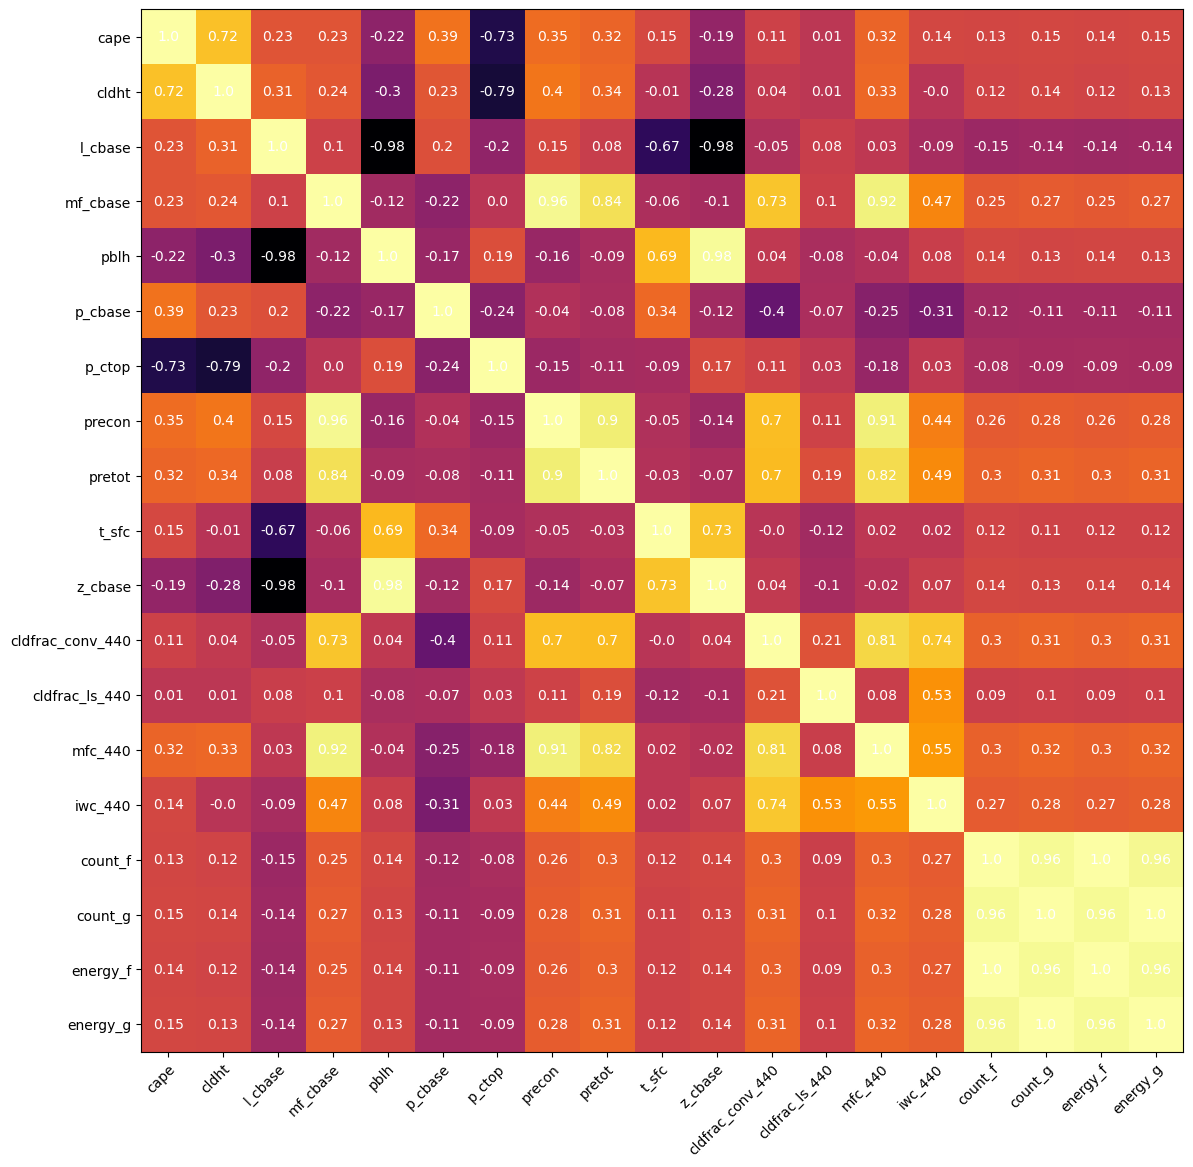

In [20]:
variables = [
    "cape",
    "cldht",
    "l_cbase",
    "mf_cbase",
    "pblh",
    "p_cbase",
    "p_ctop",
    "precon",
    "pretot",
    "t_sfc",
    "z_cbase",
    
    "cldfrac_conv_440",
    "cldfrac_ls_440",
    "mfc_440",
    "iwc_440",

    "count_f",
    "count_g",
    "energy_f",
    "energy_g",
]

matrix_corr_v2 = np.around(matrix_corr,2)

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(matrix_corr, cmap='inferno')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(variables)), labels=variables)
ax.set_yticks(np.arange(len(variables)), labels=variables)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right",
    rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, matrix_corr_v2[i, j], ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [21]:
ds_lightning = f"/aosc/eos20/djallen/data/lightning/glm/{yr_str}/GLMmax_hrly_count_g.nominalq.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc"
ds_precon = f"/aosc/eos20/djallen/lightning/geos/twod/{yr_str}{mo_str}/GEOS_precon_hrly.UT.t{yr_str}{mo_str}.r180W-30W_50S-50N.nc"

In [ ]:
matrix_corr = np.zeros((19,19))
counter = 0

for (f1, f2), (n1, n2) in zip(product(list_of_files, list_of_files),product(range(0,19),range(0,19))):

    print(n1, n2)
    
    # open and preprocess coordinates
    ds_var1 = lightningutil.open_and_preprocess(f1, lightningutil.variables)
    ds_var2 = lightningutil.open_and_preprocess(f2, lightningutil.variables)
    ds_varl = lightningutil.open_and_preprocess(ds_lightning, lightningutil.variables)
    ds_varp = lightningutil.open_and_preprocess(ds_precon, lightningutil.variables)
    
    # slicing only central us (e.g., kansas)
    ds_var1 = ds_var1.sel(Latitudes=slice(30,45),Longitudes=slice(-110,-95))
    ds_var2 = ds_var2.sel(Latitudes=slice(30,45),Longitudes=slice(-110,-95))
    ds_varl = ds_varl.sel(Latitudes=slice(30,45),Longitudes=slice(-110,-95))
    ds_varp = ds_varp.sel(Latitudes=slice(30,45),Longitudes=slice(-110,-95))
    
    if counter==0:
        
        ls_mask = xr.open_dataset(
            "/aosc/eos20/djallen/lightning/geos/twod/201907/lightning_1.ltx_inst_1hr_g720x360_x1.20190714_0100z.nc4"
        )['FRLAND'].isel(time=0)
        
        ls_mask = ls_mask.where(ls_mask<0.5,1.0)
        
        ls_mask = ls_mask.sel(
            lat=slice(ds_var1['Latitudes'][0],ds_var1['Latitudes'][-1]), 
            lon=slice(ds_var1['Longitudes'][0],ds_var1['Longitudes'][-1])
        )
        
        ls_mask = ls_mask.expand_dims(
            dim={"Datetime": 1}).transpose('lat','lon','Datetime').values
        
        counter =+ 1
    
    # remove ocean points (make nan)
    ds_var1 = xr.where(ls_mask==1, ds_var1, np.nan)
    ds_var2 = xr.where(ls_mask==1, ds_var2, np.nan)
    ds_varl = xr.where(ls_mask==1, ds_varl, np.nan)
    ds_varp = xr.where(ls_mask==1, ds_varp, np.nan)
    
    # reshape into 2D array
    ds_var1_v2 = ds_var1.stack(point=("Longitudes","Latitudes"))
    ds_var2_v2 = ds_var2.stack(point=("Longitudes","Latitudes"))
    ds_varl_v2 = ds_varl.stack(point=("Longitudes","Latitudes"))
    ds_varp_v2 = ds_varp.stack(point=("Longitudes","Latitudes"))
    
    # mask nans out
    ds_var1_v2 = ds_var1_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varl_v2 = ds_varl_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varp_v2 = ds_varp_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_var2_v2 = ds_var2_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    ds_var2_v2 = ds_var2_v2[~np.isnan(ds_var1_v2)]
    ds_varl_v2 = ds_varl_v2[~np.isnan(ds_var1_v2)]
    ds_varp_v2 = ds_varp_v2[~np.isnan(ds_var1_v2)]
    ds_var1_v2 = ds_var1_v2[~np.isnan(ds_var1_v2)]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    # where both lightning and convective precip are greater than zero
    mask = (ds_varl_v2 > 0.) & (ds_varp_v2 > 0.)  # OR is |    # AND is &
    
    ds_var1_v2 = ds_var1_v2[mask]
    ds_var2_v2 = ds_var2_v2[mask]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape)
    
    matrix_corr[n1,n2] = scipy.stats.pearsonr(
        ds_var1_v2,
        ds_var2_v2
    )[0]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16


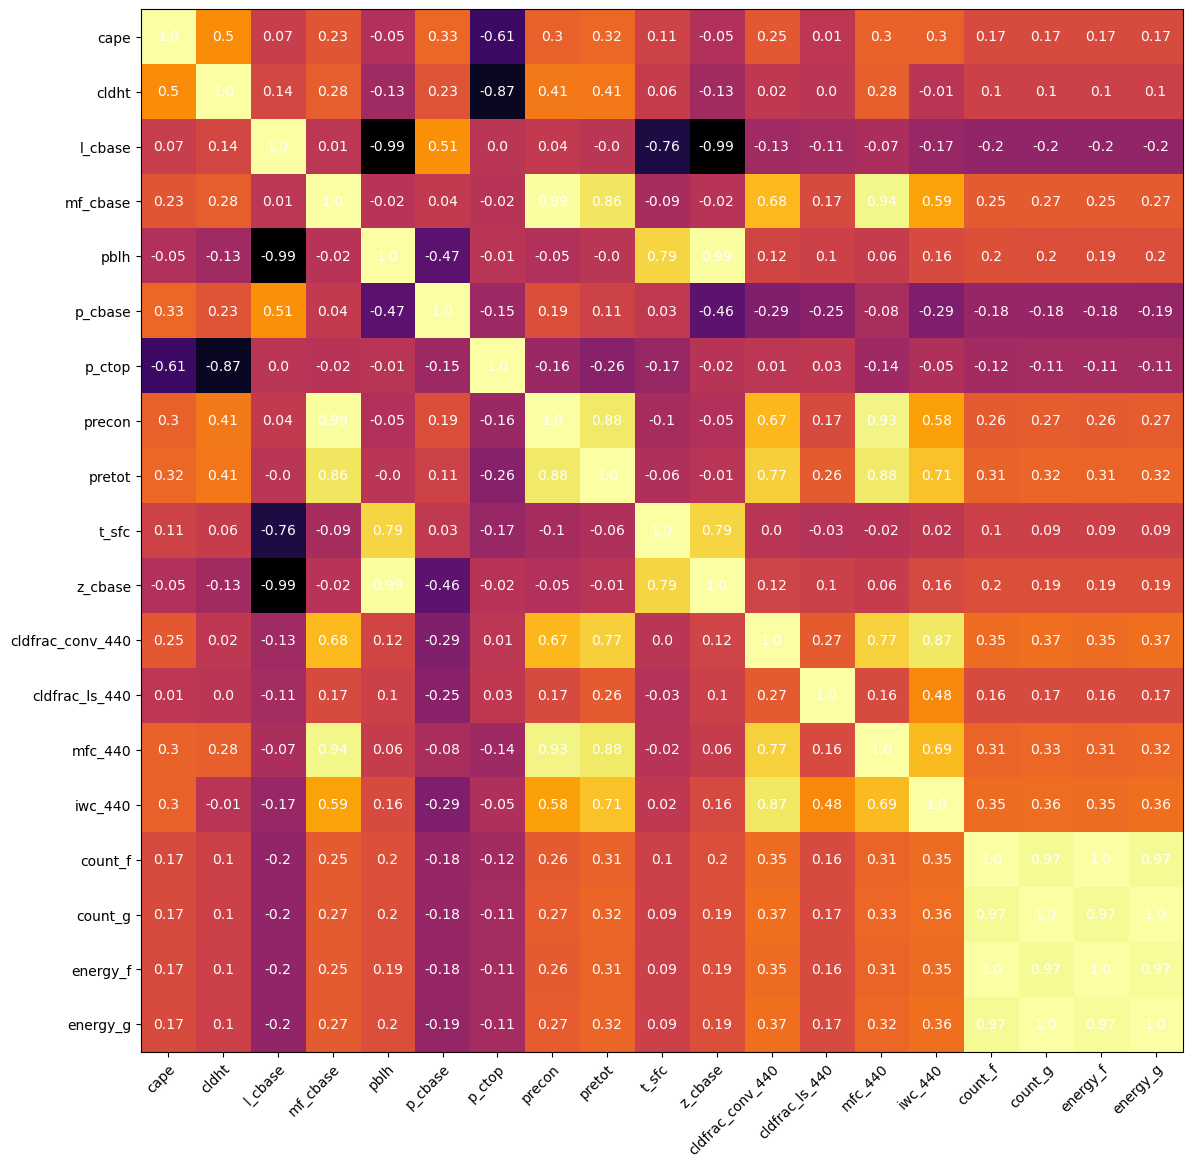

In [15]:
variables = [
    "cape",
    "cldht",
    "l_cbase",
    "mf_cbase",
    "pblh",
    "p_cbase",
    "p_ctop",
    "precon",
    "pretot",
    "t_sfc",
    "z_cbase",
    
    "cldfrac_conv_440",
    "cldfrac_ls_440",
    "mfc_440",
    "iwc_440",

    "count_f",
    "count_g",
    "energy_f",
    "energy_g",
]

matrix_corr_v2 = np.around(matrix_corr,2)

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(matrix_corr, cmap='inferno')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(variables)), labels=variables)
ax.set_yticks(np.arange(len(variables)), labels=variables)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right",
    rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, matrix_corr_v2[i, j], ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [16]:
matrix_corr = np.zeros((19,19))
counter = 0

for (f1, f2), (n1, n2) in zip(product(list_of_files, list_of_files),product(range(0,19),range(0,19))):

    print(n1, n2)
    
    # open and preprocess coordinates
    ds_var1 = lightningutil.open_and_preprocess(f1, lightningutil.variables)
    ds_var2 = lightningutil.open_and_preprocess(f2, lightningutil.variables)
    ds_varl = lightningutil.open_and_preprocess(ds_lightning, lightningutil.variables)
    ds_varp = lightningutil.open_and_preprocess(ds_precon, lightningutil.variables)
    
    # slicing only central us (e.g., kansas)
    ds_var1 = ds_var1.sel(Latitudes=slice(30,55),Longitudes=slice(-110,-75))
    ds_var2 = ds_var2.sel(Latitudes=slice(30,55),Longitudes=slice(-110,-75))
    ds_varl = ds_varl.sel(Latitudes=slice(30,55),Longitudes=slice(-110,-75))
    ds_varp = ds_varp.sel(Latitudes=slice(30,55),Longitudes=slice(-110,-75))
    
    if counter==0:
        
        ls_mask = xr.open_dataset(
            "/aosc/eos20/djallen/lightning/geos/twod/201907/lightning_1.ltx_inst_1hr_g720x360_x1.20190714_0100z.nc4"
        )['FRLAND'].isel(time=0)
        
        ls_mask = ls_mask.where(ls_mask<0.5,1.0)
        
        ls_mask = ls_mask.sel(
            lat=slice(ds_var1['Latitudes'][0],ds_var1['Latitudes'][-1]), 
            lon=slice(ds_var1['Longitudes'][0],ds_var1['Longitudes'][-1])
        )
        
        ls_mask = ls_mask.expand_dims(
            dim={"Datetime": 1}).transpose('lat','lon','Datetime').values
        
        counter =+ 1
    
    # remove ocean points (make nan)
    ds_var1 = xr.where(ls_mask==1, ds_var1, np.nan)
    ds_var2 = xr.where(ls_mask==1, ds_var2, np.nan)
    ds_varl = xr.where(ls_mask==1, ds_varl, np.nan)
    ds_varp = xr.where(ls_mask==1, ds_varp, np.nan)
    
    # reshape into 2D array
    ds_var1_v2 = ds_var1.stack(point=("Longitudes","Latitudes"))
    ds_var2_v2 = ds_var2.stack(point=("Longitudes","Latitudes"))
    ds_varl_v2 = ds_varl.stack(point=("Longitudes","Latitudes"))
    ds_varp_v2 = ds_varp.stack(point=("Longitudes","Latitudes"))
    
    # mask nans out
    ds_var1_v2 = ds_var1_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varl_v2 = ds_varl_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_varp_v2 = ds_varp_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    ds_var2_v2 = ds_var2_v2.values.flatten()[~np.isnan(ds_var2_v2.values.flatten())]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    ds_var2_v2 = ds_var2_v2[~np.isnan(ds_var1_v2)]
    ds_varl_v2 = ds_varl_v2[~np.isnan(ds_var1_v2)]
    ds_varp_v2 = ds_varp_v2[~np.isnan(ds_var1_v2)]
    ds_var1_v2 = ds_var1_v2[~np.isnan(ds_var1_v2)]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape, ds_varl_v2.shape, ds_varp_v2.shape)
    
    # where both lightning and convective precip are greater than zero
    mask = (ds_varl_v2 > 0.) & (ds_varp_v2 > 0.)  # OR is |    # AND is &
    
    ds_var1_v2 = ds_var1_v2[mask]
    ds_var2_v2 = ds_var2_v2[mask]
    
    #print(ds_var1_v2.shape, ds_var2_v2.shape)
    
    matrix_corr[n1,n2] = scipy.stats.spearmanr(
        ds_var1_v2,
        ds_var2_v2
    )[0]

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
1

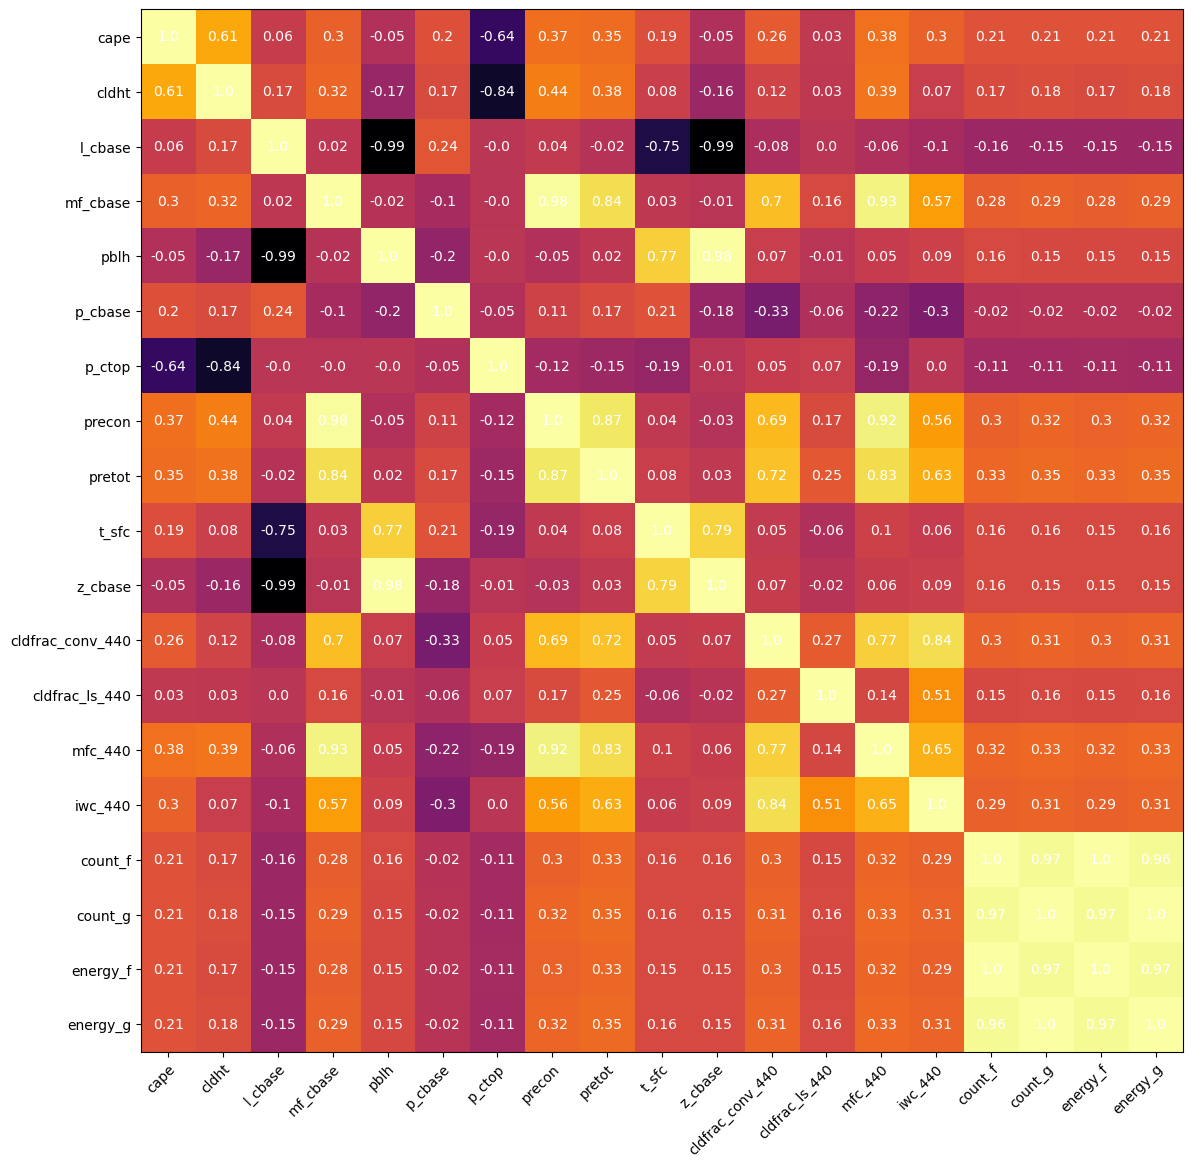

In [17]:
variables = [
    "cape",
    "cldht",
    "l_cbase",
    "mf_cbase",
    "pblh",
    "p_cbase",
    "p_ctop",
    "precon",
    "pretot",
    "t_sfc",
    "z_cbase",
    
    "cldfrac_conv_440",
    "cldfrac_ls_440",
    "mfc_440",
    "iwc_440",

    "count_f",
    "count_g",
    "energy_f",
    "energy_g",
]

matrix_corr_v2 = np.around(matrix_corr,2)

fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(matrix_corr, cmap='inferno')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(variables)), labels=variables)
ax.set_yticks(np.arange(len(variables)), labels=variables)

# Rotate the tick labels and set their alignment.
plt.setp(
    ax.get_xticklabels(), 
    rotation=45, 
    ha="right",
    rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(variables)):
    for j in range(len(variables)):
        text = ax.text(j, i, matrix_corr_v2[i, j], ha="center", va="center", color="w")

#ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
# limit domain (kansas? 30-45N 110-75W? etc)

# square root thing
# log scale for x axis 

# minimum threshold 
# set max bin value

# percentile bins

# spatial offset - do a sliding window - how to paramterize?